In [70]:
include("DiskWind/src/functions.jl")
#include("functions_w_DebugTools.jl")

getProfiles (generic function with 1 method)

In [71]:
function dvldlOld(r::Array{Float64,2},sini::Float64,cosi::Float64,ϕ::Array{Float64,2},windWeight::Float64=0.,f1::Float64=1.,f2::Float64=1.,f3::Float64=1.)
    windφ1 = 3 .*sqrt.(1 ./(2 .*r))./r .*sini^2 .* cos.(ϕ).*(√2 .*cos.(ϕ).+sin.(ϕ)./2)
    windφ2 = cosi^2 .* (1 ./ (r.^(3/2))) # should be divided by H/R, so * R/H and say H/R ~ 0.01? leaving out for now because Jason said to -> absorbed into big constant
    windφ3 = -3 .*sqrt.(1 ./(2 .*r))./r .* sini*cosi .* cos.(ϕ)
    diskφ = 3 .*sqrt.(1 ./(2 .*r))./r .*sini^2 .* (cos.(ϕ).*sin.(ϕ)./2) #disk only
    dvl = (1-windWeight).*diskφ .+ windWeight.*(f1.*windφ1 .+ f2.*windφ2 .+ f3.*windφ3) #new terms approach
    return dvl
end
function dvldl2Old(r::Array{Float64,2},sini::Float64,cosi::Float64,ϕ::Array{Float64,2},f1::Float64=1.,f2::Float64=1.,f3::Float64=1.,f4::Float64=1.)
    pre = sqrt.(1 ./(2 .*r.^3)); cosϕ = cos.(ϕ); sinϕ = sin.(ϕ)
    term1 = 3 .*sqrt.(1 ./(2 .*r))./r .*sini^2 .* cos.(ϕ).*(√2 .*cos.(ϕ).+sin.(ϕ)./2)
    term2 = cosi^2 .* (1 ./ (r.^(3/2)))
    #term12 = (3*sini^2).*(cosϕ) .* (√2*f1 .* cosϕ .+ f2/2 .* sinϕ)
    term3 = -3 .*sqrt.(1 ./(2 .*r))./r .* sini*cosi .* cos.(ϕ)
    term4 = 3 .*sqrt.(1 ./(2 .*r))./r .*sini^2 .* (cos.(ϕ).*sin.(ϕ)./2) #disk only
    #dvl =  (pre) .* (term1 .+ term2 .+ term3 .+ term4) #new terms approach
    dvl = (f1.*term1 .+ f2.*term2 .+ f3.*term3)
    return dvl,term12,term1,term2,term3,term4
end
function getIntensityOld(r::Array{Float64,2},ϕ::Array{Float64,2},windWeight::Float64,sini::Float64,cosi::Float64,rMin::Float64,rMax::Float64,γ::Float64,A0::Float64,τ::Float64;
                        f1::Float64=1.,f2::Float64=1.,f3::Float64=1.,test::Bool=false,noAbs::Bool=false)

    ϕ′ = ϕ .+ π/2
    ∇v = dvldlOld(r,sini,cosi,ϕ′,windWeight,f1,f2,f3)
    A = getA(A0,r,γ)
    I = intensity(A,r,∇v,τ,test=test,rMin=rMin,rMax=rMax,noAbs=noAbs)
    return I,γ,A0,τ
end

getIntensityOld (generic function with 1 method)

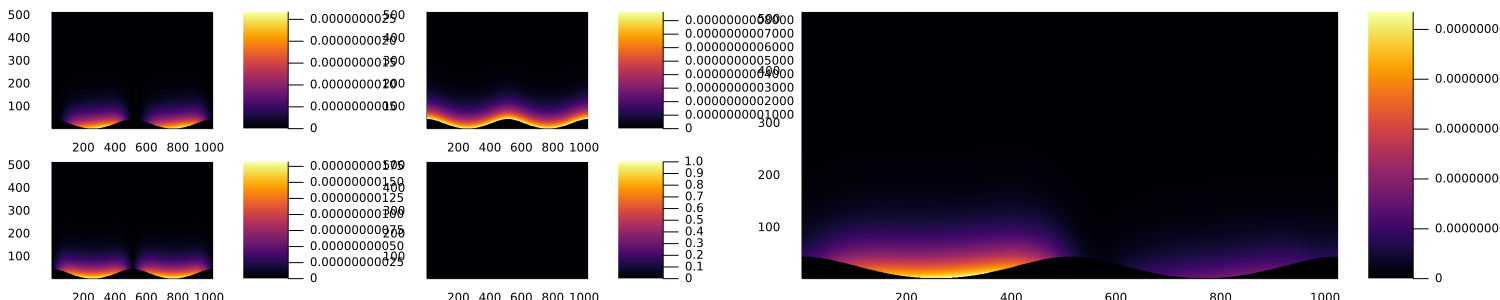

In [72]:
α,β,r,ν,ϕ,sini,cosi,dA,rMin,rMax = setup(45.,512,1024,3e3,50.,1.)
I1Old,γ,A0,τ = getIntensityOld(r,ϕ,1.,sini,cosi,rMin,rMax,1.,1.,10.,f1=1.,f2=0.,f3=0.)
I2Old,γ,A0,τ = getIntensityOld(r,ϕ,1.,sini,cosi,rMin,rMax,1.,1.,10.,f1=0.,f2=1.,f3=0.)
I3Old,γ,A0,τ = getIntensityOld(r,ϕ,1.,sini,cosi,rMin,rMax,1.,1.,10.,f1=0.,f2=0.,f3=1.)
#I4,γ,A0,τ = getIntensity(r,ϕ,sini,cosi,rMin,rMax,1.,1.,10.,f1=0.,f2=0.,f3=0.)
IOld,γ,A0,τ = getIntensityOld(r,ϕ,1.,sini,cosi,rMin,rMax,1.,1.,10.,f1=1.,f2=1.,f3=1.)
#p1=heatmap(pre.*term1);p2=heatmap(pre.*term2);p3=heatmap(pre.*term3);p4=heatmap(pre.*term4);p5 = heatmap(dvl2)
p1=heatmap(I1Old);p2=heatmap(I2Old);p3=heatmap(I3Old);p4=heatmap(zeros(size(I3Old)));p5 = heatmap(abs.(IOld))
plot(p1,p2,p3,p4,p5,layout=@layout([[grid(2,2)] E]),size=(1500,300))

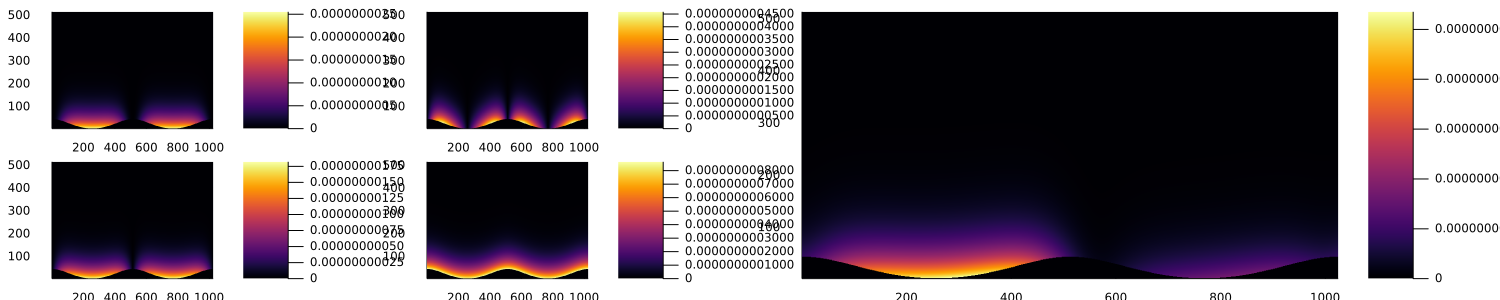

In [73]:
α,β,r,ν,ϕ,sini,cosi,dA,rMin,rMax = setup(45.,512,1024,3e3,50.,1.)
# dvl,term1,term2,term3,term4 = dvldl(r,sini,cosi,ϕ.+π/2)
# den = sum(term1.+term2.+term3.+term4)
# den2 = sum(term1)+sum(term2)+sum(term3)+sum(term4)
# println(den/den2)
# pre = sqrt.(1 ./(2 .*r.^3))
# dvl2 = pre .* (term1.+term2.+term3.+term4)
# dvl3 = pre.*term1 .+ pre.*term2 .+ pre.*term3 .+ pre.*term4
I1,γ,A0,τ = getIntensity(r,ϕ,sini,cosi,rMin,rMax,1.,1.,10.,f1=1.,f2=0.,f3=0.,f4=0.)
I2,γ,A0,τ = getIntensity(r,ϕ,sini,cosi,rMin,rMax,1.,1.,10.,f1=0.,f2=1.,f3=0.,f4=0.)
I3,γ,A0,τ = getIntensity(r,ϕ,sini,cosi,rMin,rMax,1.,1.,10.,f1=0.,f2=0.,f3=1.,f4=0.)
I4,γ,A0,τ = getIntensity(r,ϕ,sini,cosi,rMin,rMax,1.,1.,10.,f1=0.,f2=0.,f3=0.,f4=1.)
I,γ,A0,τ = getIntensity(r,ϕ,sini,cosi,rMin,rMax,1.,1.,10.,f1=1.,f2=1.,f3=1.,f4=1.)
#p1=heatmap(pre.*term1);p2=heatmap(pre.*term2);p3=heatmap(pre.*term3);p4=heatmap(pre.*term4);p5 = heatmap(dvl2)
p1=heatmap(I1);p2=heatmap(I2);p3=heatmap(I3);p4=heatmap(I4);p5 = heatmap(abs.(I))
plot(p1,p2,p3,p4,p5,layout=@layout([[grid(2,2)] E]),size=(1500,300))



In [74]:
sum(I.-IOld)/sum(I)
#sum(I1.+I2.-I1Old)/sum(I1.+I2)
#sum(I3.-I3Old)/(sum(I3))
#sum(I4.-I2Old)/sum(I4)

#TAKEAWAY: Panels match between old (f1,f2,f3) model and new (f1,f2,f3,f4) model, total sum matches

-2.5838456588532584e-17

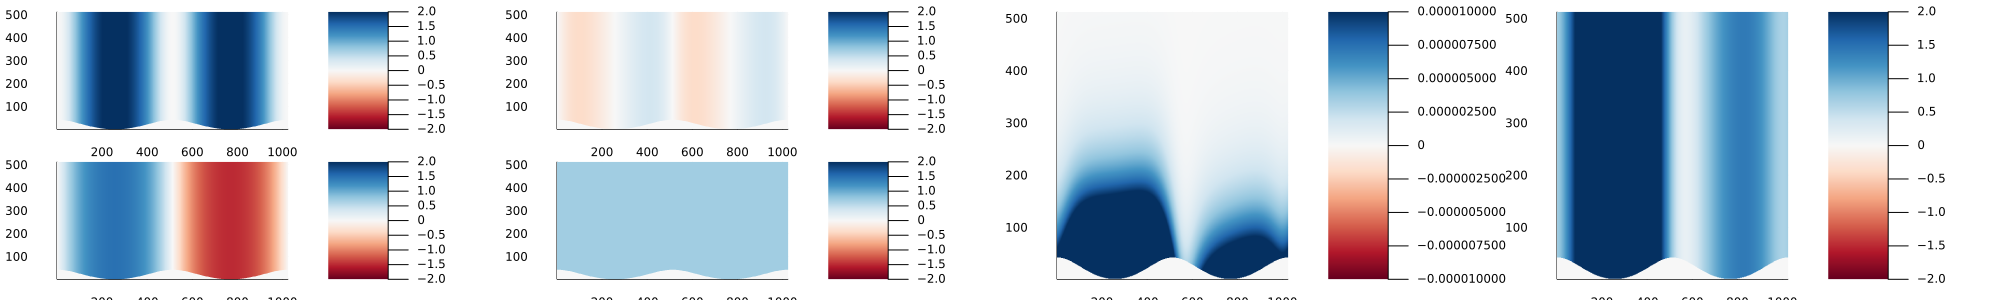

In [75]:
function dvldl2(r::Array{Float64,2},sini::Float64,cosi::Float64,ϕ::Array{Float64,2},f1::Float64=1.,f2::Float64=1.,f3::Float64=1.,f4::Float64=1.)
    pre = sqrt.(1 ./(2 .*r.^3)); cosϕ = cos.(ϕ); sinϕ = sin.(ϕ)
    term1 = f1*((3*sini^2*√2) .* (cosϕ.^2))
    term2 = f2*((3*sini^2/2) .* (cosϕ .* sinϕ)) #disk only
    term12 = (3*sini^2).*(cosϕ) .* (√2*f1 .* cosϕ .+ f2/2 .* sinϕ)
    term3 = ((-f3*3*sini*cosi) .* cosϕ)
    term4 = f4*√2*cosi^2 .*ones(size(pre)) #otherwise term4 does not have right shape
    #dvl =  (pre) .* (term1 .+ term2 .+ term3 .+ term4) #new terms approach
    dvl = pre.*(term12 .+ term3 .+ term4)
    return dvl,term12,term1,term2,term3,term4
end
mask = r.<rMin; xticks = (range(1,stop=1024,length=1024),ϕ[1,:]); yticks = (range(1,stop=512,length=512),r[:,1])
xticks=:auto; yticks=:auto
α,β,r,ν,ϕ,sini,cosi,dA,rMin,rMax = setup(45.,512,1024,3e3,50.,1.)
dvl,term12,term1,term2,term3,term4 = dvldl2(r,sini,cosi,ϕ.+π/2,1.,1.,1.,1.)
dvl[mask] .= 0.; term12[mask] .= 0.; term1[mask] .= 0.; term2[mask] .=0.; term3[mask].=0.;term4[mask].=0.
p1=heatmap(term1,clims=(-2.,2.),c=:RdBu,xticks=xticks,yticks=yticks);p2=heatmap(term2,clims=(-2.,2.),c=:RdBu,xticks=xticks,yticks=yticks);
p3=heatmap(term3,clims=(-2.,2.),c=:RdBu,xticks=xticks,yticks=yticks);p4=heatmap(term4,clims=(-2.,2.),c=:RdBu,xticks=xticks,yticks=yticks);
p5 = heatmap(dvl,c=:RdBu,clims=(-0.00001,0.00001),xticks=xticks,yticks=yticks);p6 = heatmap(term1.+term2.+term3.+term4,c=:RdBu,clims=(-2.,2.),xticks=xticks,yticks=yticks)
plot(p1,p2,p3,p4,p5,p6,layout=@layout([[grid(2,2)] [E F]]),size=(2000,300))

#TAKEAWAY: f2 and f3 terms are *directional* -- if disk is rotating one way (default) they will net ADD intensity to left (low) ϕ and SUBTRACT from right (high) ϕ
#Need to allow the disk to rotate *either* direction, so f2 and f3 can now be negative but must have the same sign in fitting
#play with this cell altering strengths of f2 and f3 to observe effect more drastically

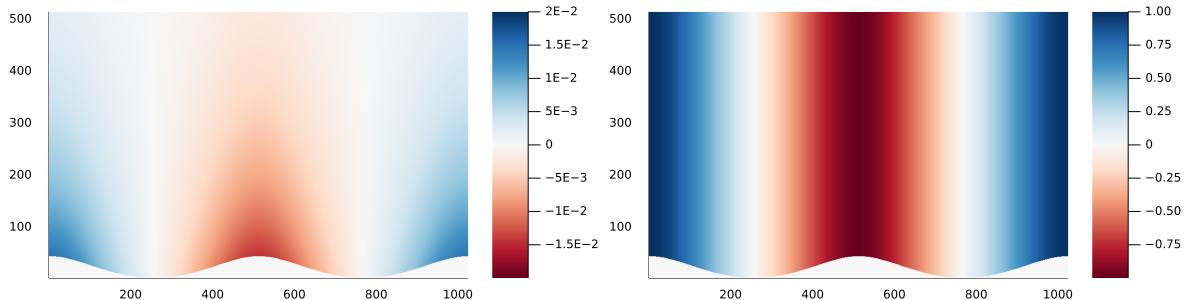

In [76]:
mask = r.<rMin
ν[mask] .= 1.; ϕ[mask] .= π/2.
p1=heatmap(ν.-1,c=:RdBu,clims=(-0.02,0.02))
p2=heatmap(cos.(ϕ),c=:RdBu)
plot(p1,p2,size=(1200,300))

#TAKEAWAY: we sum binning across ν space, which is sign dependent on cos(ϕ) -- this means that since terms 2 and 3 have opposite signs about the center of ϕ space they net add to zero, which is why it's important to take the absolute value
#this mostly explains why I was getting weird plots when trying to do no absolute value on the terms.

sum of left side = 9.04467598283974e-5
sum of right side = 2.6671922182253787e-5
total = 0.0001171186820106512


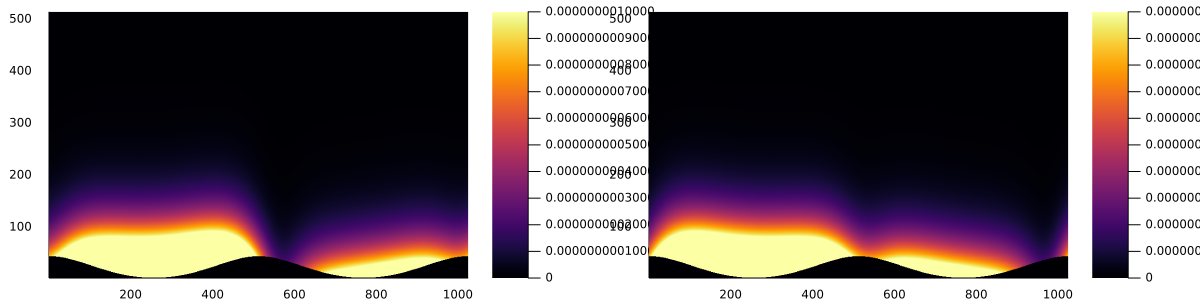

In [77]:
α,β,r,ν,ϕ,sini,cosi,dA,rMin,rMax = setup(45.,512,1024,3e3,50.,1.)
τ = 10.; A = getA(1.,r,1.); pre = sqrt.(1 ./(2 .*r.^3))
IRec = A ./ (4π.*r.^2) .* abs.(dvl) .* (1-exp(-τ))
I,γ,A0,τ = getIntensity(r,ϕ,sini,cosi,rMin,rMax,1.,1.,10.,f1=1.,f2=-1.,f3=1.,f4=1.)
p1=heatmap(IRec,clims=(0.,1e-9))
p2=heatmap(I,clims=(0.,1e-9))
println("sum of left side = $(sum(I[:,1:513]))")
println("sum of right side = $(sum(I[:,514:end]))")
println("total = $(sum(I))")
plot(p1,p2,size=(1200,300))
#TAKEAWAY: another comparison initially used to validate the model, but now the right panel shows an example of what happens when changing the rotation of the disk. 
#Can vary f2 and f3 here to see their effects against the f1=f2=f3=f4 case

In [8]:
clims=(-2.,2.)./200; xlims=(500,525); ylims=(0,50)
p1=heatmap(term1.+term2,c=:RdBu,clims=clims,xlims=xlims,ylims=ylims)
p1=vline!([512.5],c=:black,lw=3,ls=:dash,label="")
p2=heatmap(term1,c=:RdBu,clims=clims,xlims=xlims,ylims=ylims)
p2=vline!([512.5],c=:black,lw=3,ls=:dash,label="")
p3=heatmap(term2,c=:RdBu,clims=clims,xlims=xlims,ylims=ylims)
p3=vline!([512.5],c=:black,lw=3,ls=:dash,label="")
P=plot(p3,p1,p2,size=(1000,800))
png(P,"spikeProblem.png")
#TAKEAWAY -- no longer relevant, but part of debugging process where I was checking how individual terms looked in comparison to each other

In [7]:
p1=heatmap(ϕ,c=:RdBu,clims=(-π,π),xlims=xlims,ylims=ylims)
p1=vline!([512.5],c=:black,lw=3,ls=:dash,label="")
png(p1,"ϕMap.png")
#TAKEAWAY -- no longer relevant, just used in finding / validating the middle index in ϕ space

In [50]:
data = readPickle("3c273_juljanmarmay_append_gilles_specirf_wide_v6.p")
#i = 89.56, rMin = 6585.33, MFac = 0.17, rFac = 39.01, f1 (sin^2) = 0.68, f2 (cos^2) = 0.65, f3 (sin*cos)= 0.35, pa = 328.33, scale = 0.98, cenShift = 0.0005
θ = [89.56,6585.33,0.17,39.01,0.68,1.,0.65,0.35,328.33,0.98,0.0005]
ν,line,phaseList = getProfiles(θ,data)

#TAKEAWAY -- simple testing cell of the whole process

([2.1264593601226807, 2.128660202026367, 2.130861282348633, 2.1330623626708984, 2.135263204574585, 2.1374642848968506, 2.139665126800537, 2.1418659687042236, 2.14406681060791, 2.146267890930176  …  2.192487955093384, 2.1946890354156494, 2.196889877319336, 2.1990909576416016, 2.201291799545288, 2.2034928798675537, 2.2056937217712402, 2.207894802093506, 2.2100958824157715, 2.212296724319458], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.3389069254637762e-6, 0.021786439758686802  …  0.08884772215098583, 0.04454387442523365, 0.04389637965722882, 0.012937169194307867, 0.011909407176453236, 0.0, 0.0, 0.0, 0.0, 0.0], Any[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.1342656775047343e-7, -0.002156862184565039  …  0.009619431215113133, 0.004326817487255558, 0.004348232517381494, 0.0011840507711949448, 0.0010366897275967527, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -1.4188416931262078e-7, -0.002697997527810568  …  0.012006981350610863, 0.005401015848911303, 0.00543025875594

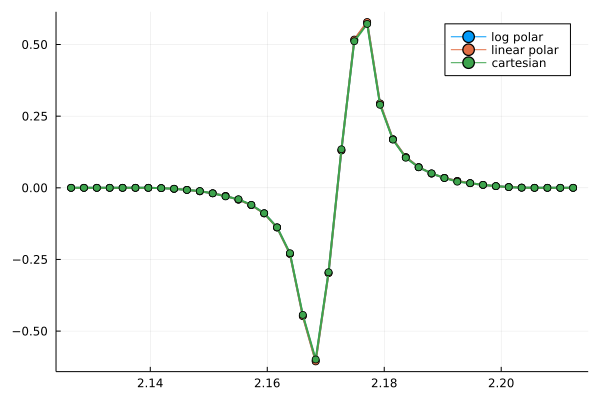

In [6]:
#pPhaseOn = diagnosticPhasePlot(i=45.,windWeight=1.,f1=1.,f2=0.,f3=0.,pa=330.,n1=2048,n2=2048,bins=100,νMin=0.98,νMax=1.02)

In [51]:
function modelViz(params::Array{Float64,},data::Array{Array{Float64,N} where N, 1},
        bins::Int=200,nr::Int=1024,nϕ::Int=2048,coordsType::Symbol=:polar,scale_type::Symbol=:log,νMin = 0.98, νMax = 1.025;genComparison=false,centered=true,noAbs=false,norm=false,old=false)

    i,r̄,Mfac,rFac,f1,f2,f3,f4,pa,scale,cenShift = params; γ = 1.; A0 = 1.; τ = 10. #some parameters fixed for now
    λCen = 2.172 + cenShift #microns, to compare with data
    #ν = (data[1].-2.172)./λCen #code units, cenShift should be small this is just for calculating min and max
    BLRAng = Mfac*3e8*2e33*6.67e-8/9e20/548/3.09e24 #solar masses * G / c^2 / Mpc -> end units = rad
    α,β,r,ν,ϕ,sini,cosi,dA,rMin,rMax = setup(i,nr,nϕ,r̄,rFac,γ,coordsType,scale_type)
    function getReturn(α,β,r,ν,ϕ,sini,cosi,dA,rMin,rMax,bins,νMin,νMax;f1,f2,f3,f4,total=false,old=false)
        I,γ,A0,τ = old == false ? getIntensity(r,ϕ,sini,cosi,rMin,rMax,γ,A0,τ,f1=f1,f2=f2,f3=f3,f4=f4,noAbs=noAbs) : getIntensityOld(r,ϕ,1.,sini,cosi,rMin,rMax,1.,1.,10.,f1=f1,f2=f2,f3=f3,noAbs=noAbs)
        νEdges,νCenters,flux = histSum(ν,I.*dA,bins=bins,νMin=νMin,νMax=νMax,centered=centered)

        #phases at resolution of binning
        UData = data[2]; VData = data[3]; psf=4e-3/2.35
        X = α.*BLRAng; Y = β.*BLRAng
        dϕList = []
        for i=1:length(UData)
            for ii in [I]
                dϕAvgRaw = phase(ν,ii,dA,X,Y,r,UData[i],VData[i],pa,νMin,νMax,bins) 
                dϕAvg = G1D(dϕAvgRaw,psf/3e5/(νCenters[2]-νCenters[1]))
                push!(dϕList,dϕAvg)
            end
        end
        #line profile
        if total == false
            fline = norm == true ? flux./maximum(flux)*maximum(data[4])*scale : flux
            lineAvg = G1D(fline,psf/3e5/(νCenters[2]-νCenters[1]))
            λ = λCen ./ νCenters
            return [reverse(λ),reverse(lineAvg),[dϕ.*reverse(lineAvg) for dϕ in dϕList]],maximum(flux)
        else
            fline = norm == true ? flux./maximum(flux)*maximum(data[4])*scale : flux
            lineAvg = G1D(fline,psf/3e5/(νCenters[2]-νCenters[1]))
            λ = λCen ./ νCenters
            return [reverse(λ),reverse(lineAvg),[dϕ.*reverse(lineAvg) for dϕ in dϕList]],genComparison
        end
    end
    ret1,overallMax = getReturn(α,β,r,ν,ϕ,sini,cosi,dA,rMin,rMax,bins,νMin,νMax,f1=f1,f2=f2,f3=f3,f4=f4)
    returnList = [ret1]
    if genComparison == true
        push!(returnList,getReturn(α,β,r,ν,ϕ,sini,cosi,dA,rMin,rMax,bins,νMin,νMax,f1=f1,f2=0.,f3=0.,f4=0.,total=overallMax)[1])
        push!(returnList,getReturn(α,β,r,ν,ϕ,sini,cosi,dA,rMin,rMax,bins,νMin,νMax,f1=0.,f2=f2,f3=0.,f4=0.,total=overallMax)[1])
        push!(returnList,getReturn(α,β,r,ν,ϕ,sini,cosi,dA,rMin,rMax,bins,νMin,νMax,f1=0.,f2=0.,f3=f3,f4=0.,total=overallMax)[1])
        push!(returnList,getReturn(α,β,r,ν,ϕ,sini,cosi,dA,rMin,rMax,bins,νMin,νMax,f1=0.,f2=0.,f3=0.,f4=f4,total=overallMax)[1])
    end
    return returnList
end

modelViz (generic function with 8 methods)

Model (all terms) sum = 0.020724000398694275
f1 = 1.0 only sum = 0.012430926455204439
f2 = 1.0 only sum = 0.002798049423535263
f3 = 1.0 only sum = 0.011191838527428822
f4 = 1.0 only sum = 0.00829307394348984


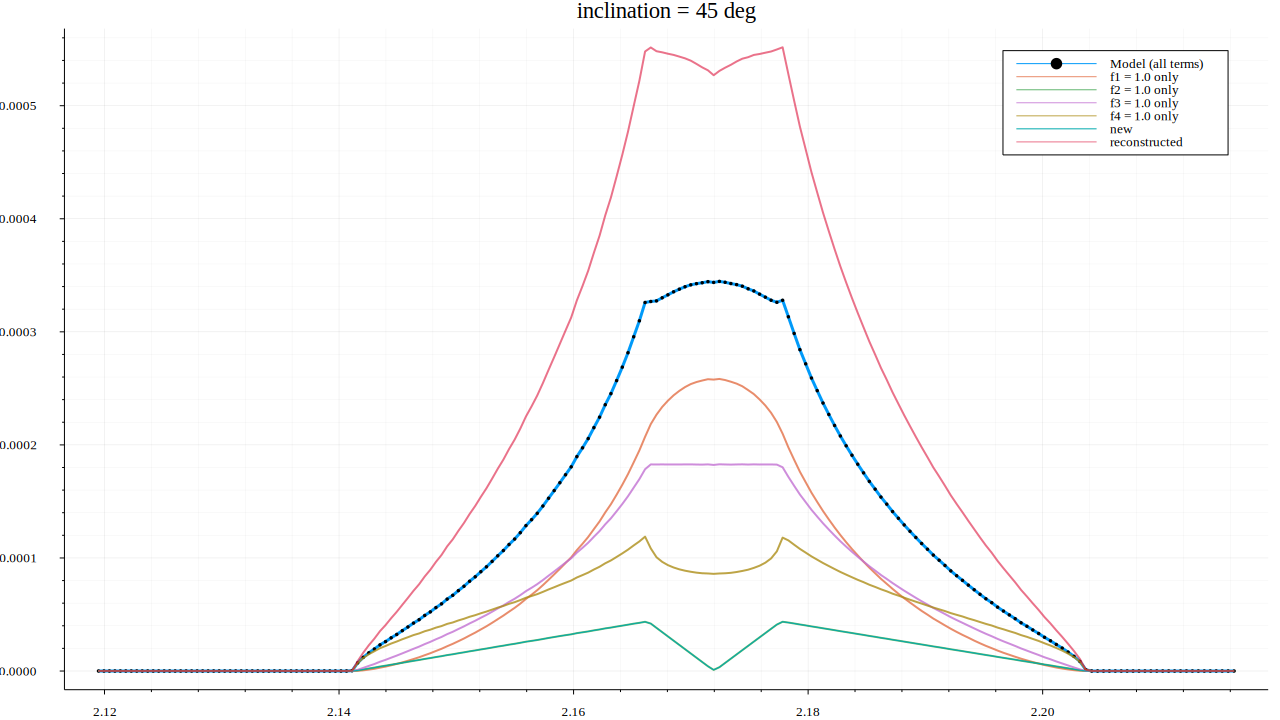

In [87]:
#paper plots
#1 f1 only
θ = [45.,3e3,1.,30.,1.,1.,1.,1.,300,1.,0.]
θOld = [45.,6228.,0.17,39.01,1.,1.,1.,1.,330.,0.98,0.00]
retList = modelViz(θ,data,200,1024,2048,genComparison=true,centered=true,noAbs=false)
retListOld = modelViz(θOld,data,200,1024,2048,genComparison=true,centered=false,noAbs=true)
#p=plot(data[1],data[4],label="data",marker=:circle,size=(1280,720),lw=3)
p = plot(size=(1280,720),minorgrid=true,fontfamily="times",tickdirection=:out,title="inclination = 45 deg")
labels=["Model (all terms)","f1 = $(θ[5]) only","f2 = $(θ[6]) only","f3 = $(θ[7]) only", "f4 = $(θ[8]) only"]
for i=1:length(retList)
    λModel,lineModel,phaseListModel = retList[i]
    println(labels[i]," sum = ",sum(lineModel))
    if i>1
        p=plot!(λModel,(lineModel),label=labels[i],lw=2,α=0.8)
    else
        p=plot!(λModel,(lineModel),label=labels[i],lw=3,α=1.,marker=:circle,markercolor=:black,ms=2)
    end
end
λModel,lineModel,phaseListModel = retList[3]
negSide = λModel .<= 2.172
new = vcat(lineModel[negSide] .*= 1, lineModel[.! negSide])
#new = copy(lineModel)
plot!(λModel,new,label="new")
λModel,lineModel,phaseListModel = retList[2]
reconstructedLine = copy(lineModel)
reconstructedLine .+= new
λModel,lineModel,phaseListModel = retList[4]
new = vcat(lineModel[negSide].*=1, lineModel[.! negSide])
reconstructedLine .+= new #term 3
λModel,lineModel,phaseListModel = retList[5]
reconstructedLine .+= lineModel #term 4
plot!(λModel,reconstructedLine,label="reconstructed",lw=2,c=:crimson,alpha=0.6)
display(p)

#TAKEAWAY -- the "reconstruction" doesn't sum to the correct total because |a+b+c+d| != |a| + |b| + |c| + |d|, but it does work in the limit where f2=f3=0 because then all terms are + 
#adding strength to f2 / f3 weights one side of the line profile over the other as described above (see I maps)
#and the right side of λ space corresponds to right side of ϕ space so I maps directly here
#making f2/f3 - results in the slope of the weight being reversed (i.e. when positive it causes left side to be lower but right to be higher and vice versa)

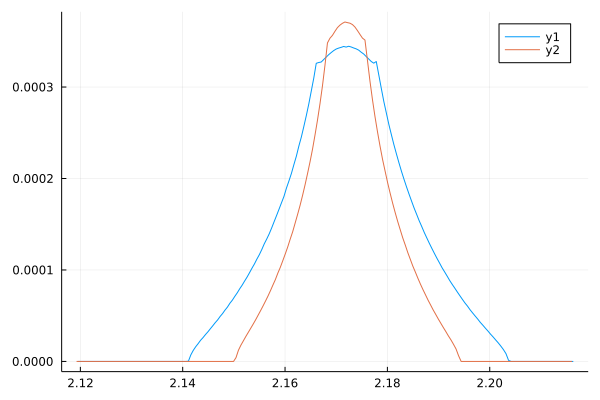

In [88]:
λModel,lineModel,phaseListModel = retList[1]
λModelOld,lineModelOld,phaseListModelOld = retListOld[1]
plot(λModel,lineModel)
plot!(λModelOld,lineModelOld)

#TAKEAWAY -- verification again that both old and new models produce same result, but note only works when θ = θOld in the cell above, which is not currently the case

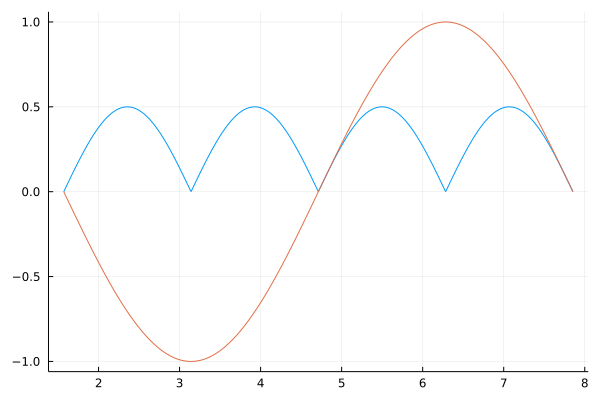

In [56]:
#From here on is binned statistic debugging

#TO-DO: make "centered" symmetric (i.e. add one extra bin on the right side instead of just shifting to left)
ϕ = range(0,stop=2π,length=1000).+π/2
plot(ϕ,abs.(cos.(ϕ).*sin.(ϕ)),label="")
plot!(ϕ,cos.(ϕ),label="")

Δ = 2.0
-0.25:0.5:99.75
[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 25.5, 26.0, 26.5, 27.0, 27.5, 28.0, 28.5, 29.0, 29.5, 30.0, 30.5, 31.0, 31.5, 32.0, 32.5, 33.0, 33.5, 34.0, 34.5, 35.0, 35.5, 36.0, 36.5, 37.0, 37.5, 38.0, 38.5, 39.0, 39.5, 40.0, 40.5, 41.0, 41.5, 42.0, 42.5, 43.0, 43.5, 44.0, 44.5, 45.0, 45.5, 46.0, 46.5, 47.0, 47.5, 48.0, 48.5, 49.0, 49.5, 50.0, 50.5, 51.0, 51.5, 52.0, 52.5, 53.0, 53.5, 54.0, 54.5, 55.0, 55.5, 56.0, 56.5, 57.0, 57.5, 58.0, 58.5, 59.0, 59.5, 60.0, 60.5, 61.0, 61.5, 62.0, 62.5, 63.0, 63.5, 64.0, 64.5, 65.0, 65.5, 66.0, 66.5, 67.0, 67.5, 68.0, 68.5, 69.0, 69.5, 70.0, 70.5, 71.0, 71.5, 72.0, 72.5, 73.0, 73.5, 74.0, 74.5, 75.0, 75.5, 76.0, 76.5, 77.0, 77.5, 78.0, 78.5, 79.0, 79.5, 80.0, 80.5, 81.0, 81.5, 82.0, 82.5,

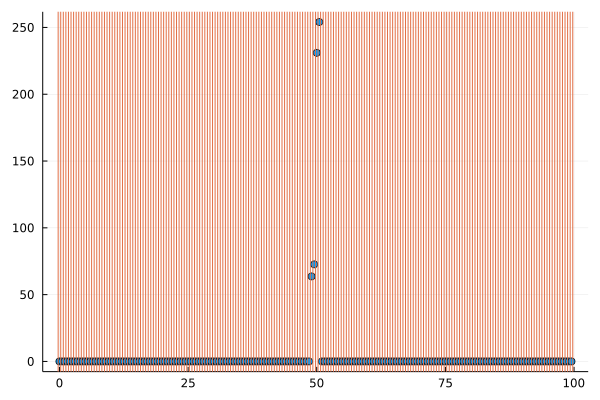

In [85]:
using Distributions
x = rand(Uniform(49,51),10); y = rand(Uniform(0,100),10)
nbins = 200; binMax = 100; binMin = 0; statistic = :sum    
Δ = nbins/(binMax - binMin)#spacing
println("Δ = $Δ")
result = zeros(nbins)
edges = range(binMin, stop=binMax, length=nbins+1) .- 1/Δ/2
centers = [(edges[i]+edges[i+1])/2 for i=1:length(edges)-1]
println(edges,"\n",centers)
sub = binMin - 1/Δ/2
if statistic == :sum
    for (x, y) in zip(x, y)
        i = min(nbins, 1 + floor(Int, Δ * max(0., x -sub))) #which bin are we in at this x?
        println("x = $x; i = $i; bounded by $(edges[i]) (left) and $(edges[i+1]) (right)")
        result[i] += y
    end
end
scatter(centers,result,label="")
vline!(edges,label="")

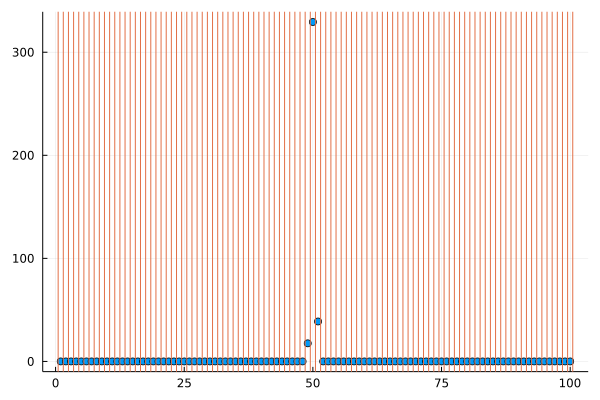

In [13]:
edges,centers,result=histSum(x,y,νMin=0.,νMax=100.,bins=100)
scatter(centers,result,label="")
vline!(edges,label="")

In [21]:
νEdges,νCenters,flux = histSum(ν,I.*dA,bins=200,νMin=0.98,νMax=1.02,centered=true)

(2500.9799999999977:0.0002:2501.0199999999977, [2500.980099999998, 2500.9802999999974, 2500.980499999998, 2500.9806999999973, 2500.9808999999977, 2500.981099999998, 2500.9812999999976, 2500.981499999998, 2500.9816999999975, 2500.981899999998  …  2501.0180999999975, 2501.018299999998, 2501.0184999999974, 2501.018699999998, 2501.0188999999973, 2501.0190999999977, 2501.019299999998, 2501.0194999999976, 2501.019699999998, 2501.0198999999975], [0.01965699563620001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

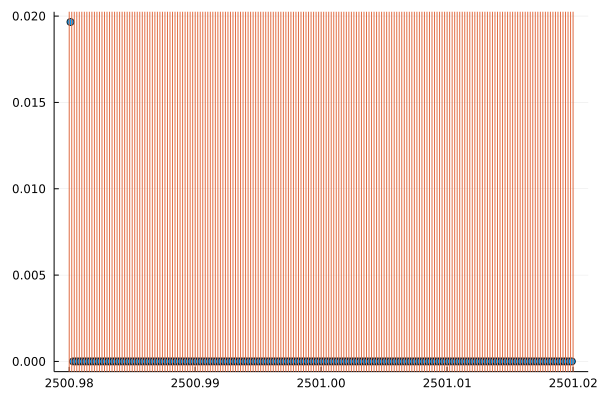

In [23]:
scatter(νCenters,flux,label="")
vline!(νEdges,label="")

In [6]:
function binnedStat(x::Array{Float64,}, y::Array{Float64,}; nbins::Int=100, statistic::Symbol=:sum, f::Function=binnedStatistic,binMax=nothing,binMin=nothing,centered=false)
    if length(x) > 0 && nbins < 1
        throw(ArgumentError("number of bins must be ≥ 1 for a non-empty array, got $nbins"))
    end
    if length(vec(x)) != length(vec(y))
        throw(ArgumentError("length of x must match length of y"))
    end
    binMax = binMax == nothing ? maximum(x) : binMax
    binMin = binMin == nothing ? minimum(x) : binMin
    if binMax == binMin
        throw(ArgumentError("No valid binning is possible between minimum $binMin and maximum $binMax"))
    end
    result = zeros(nbins)
    Δ = nbins/(binMax-binMin) #spacing
    println(Δ)
    sub = centered == false ? binMin : binMin - 1/Δ/2 #subtract binMin + Δ/2 to "center" bins (i.e. binMin and binMax are centers, not edges)
    if statistic == :sum
        for (x, y) in zip(x, y)
            i = min(nbins, 1 + floor(Int, Δ * max(0., x - sub))) #which bin are we in at this x?
            result[i] += y
        end
    elseif statistic == :mean || statistic == :std || statistic == :var
        N = zeros(nbins)
        for (x, y) in zip(x, y)
            i = min(nbins, 1 + floor(Int, Δ * max(0., x - sub)))
            result[i] += y
            N[i] += 1 #need to keep track of number of counts in each bin for mean, std, var
        end
        N[N .== 0.] .= 1. #no dividing by zero
        result ./= N
        if statistic == :std || statistic == :var
            μ = copy(result)
            result = zeros(nbins)
            for (x, y) in zip(x, y)
                i = min(nbins, 1 + floor(Int, Δ * max(0., x - sub)))
                result[i] += (y-μ[i])^2
            end
            result ./= N
            if statistic == :std
                @. result = √result
            end
        end
    elseif statistic == :median || statistic == :f #this is much slower than other options
        result = zeros(nbins)
        i = min.(nbins, 1 .+ floor.(Int, Δ * max.(0., x .- sub)))
        for ind in unique(i)
            result[ind] = statistic == :median ? median(y[i.==ind]) : f(y[i.==ind])
        end
    else
        throw(ArgumentError("Valid statistic options are :sum, :mean, :std, :var, :median, or :f (use :f for custom function), got $statistic"))
    end
    edges = centered == false ? range(binMin, stop=binMax, length=nbins+1) : range(binMin, stop=binMax, length=nbins+1) .- 1/Δ/2
    centers = [(edges[i]+edges[i+1])/2 for i=1:length(edges)-1]
    return edges, centers, result
end
function histSum2(x::Array{Float64,},y::Array{Float64,};bins::Int=200,νMin::Float64,νMax::Float64,centered=true)
    return binnedStat(x,y,nbins=bins,binMin=νMin,binMax=νMax,centered=centered)
end

histSum2 (generic function with 1 method)

In [91]:
νEdges,νCenters,flux = histSum2(ν,I.*dA,bins=200,νMin=0.98,νMax=1.02,centered=true)

4999.999999999995


(0.9799:0.0002:1.0199, [0.98, 0.9802, 0.9803999999999999, 0.9806, 0.9808, 0.981, 0.9812, 0.9814, 0.9816, 0.9818  …  1.018, 1.0182, 1.0184, 1.0186, 1.0188, 1.019, 1.0192, 1.0194, 1.0196, 1.0198], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

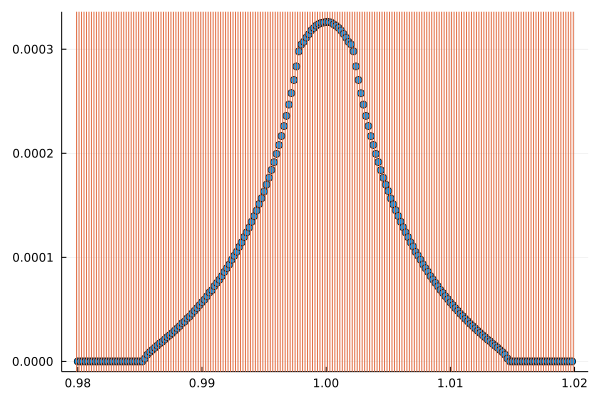

In [92]:
scatter(νCenters,flux,label="")
vline!(νEdges,label="")

In [89]:
flux

200-element Vector{Float64}:
 0.01965699563620001
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0